** ANALYSIS ON CRIME IN LOS ANGELES ** 

** Questions to answer:**

1. In which day of the week was crime reported the most?
2. In which time group (time grouped in 4 hour intervals) has crime been occurred the most?
3. In which area ID has crime been reported the most?
4. What kind of crime occurred the most?
5. What is the victim age average and which age group is victimized the most?
6. Which gender is victimized the most?
7. Which descent is victimized the most?
8. What type of structure, vehicle, or location did the crime take place?
9. Which weapon is used the most?
10. What are the top 3 locations in crime?

** Column explanations: **
* DR Number: division of records number  
* Date Reported: MM/DD/YYYY  
* Date Occurred: MM/DD/YYYY  
* Time Occurred: 24 hour military time  
* Area ID: geographical area numbered from 1-21
* Area Name: 
* Reporting District: a four digit code that represents a sub-area
* Crime Code: indicated the crime committed
* Crime Code Description: defines the crime code provided
* MO Codes: Activities associated with the suspect (descriptions are provided in the PDF file)
* Victim Age:
* Victim Sex: F: female; M: male; X: unknown
* Victim Descent (codes): 
    * A: other Asian
    * B: Black
    * C: Chinese
    * D: Cambodian
    * F: Filipino 
    * G: Guamanian 
    * H: Hispanic/Latin/Mexican
    * I: American Indian/Alaskan Native
    * J: Japanese
    * K: Korean
    * L: Laotian
    * O: Other
    * P: Pacific Islander
    * S: Samoan
    * U: Hawaiian 
    * V: Vietnamese
    * W: White
    * X: Unknown
    * Z: Asian Indian
* Premise Code: The type of structure, vehicle, or location where the crime took place
* Premise Description: Defines the premise Code
* Weapon used code: the type of weapon used in the crime
* Weapon Description:
* Status Code: Status of the code (IC is the default)
* Status description: 
* Crime code 1: indicates the crime committed. Crime Code 1 is the primary and the most serious one. Crime code 2,3,4 are respectively less serious offenses. 
* Crime code 2: may contain a code for an additional crime
* Crime code 3: may contain a code for an additional crime
* Crime code 4: may contain a code for an additional crime
* Address: street address of crime incident rounded to the nearest hundred block to maintain anonymity
* Cross Street: cross street of rounded address
* Location: the location where the crime incident occurred. 
    



In [1]:
import pandas as pd
data =pd.read_csv('Crime_data.csv')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [4]:
data.dtypes

DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

# Q1: In which day of the week was crime reported the most?

In [5]:
data[data['Date Reported'].isnull()] #there are no null values in the date reported

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location


In [6]:
data['Date Reported'].dtypes # this is an object, we need timestamp

dtype('O')

In [7]:
#converting date to timestamp:
data['Date Reported'] = pd.to_datetime(data['Date Reported'])

In [8]:
data['Date Reported'].dtypes #this is a timestamp type

dtype('<M8[ns]')

In [9]:
data['Date Reported'][1] # timestamp

Timestamp('2010-01-25 00:00:00')

In [10]:
data['Date Reported'].head()

0   2013-03-14
1   2010-01-25
2   2013-03-19
3   2010-11-11
4   2014-01-11
Name: Date Reported, dtype: datetime64[ns]

In [11]:
#create a weekdays column:
weekdays = data['Date Reported'].dt.weekday
data = data.assign(weekdays=weekdays) #assigning the column to the dataset
data.head()
#these numbers correspond to days

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays
0,1208575,2013-03-14,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",3
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",0
2,418,2013-03-19,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",1
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",3
4,42104479,2014-01-11,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",5


In [12]:
#add names to weekdays:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}

data.weekdays = data.weekdays.apply(lambda x:weekday_dict[x]) #applying weekday names to the weekdays column


In [13]:
data.head() #now we have the day names

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays
0,1208575,2013-03-14,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",Thursday
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",Monday
2,418,2013-03-19,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",Tuesday
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",Thursday
4,42104479,2014-01-11,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",Saturday


In [14]:
#counting all the variables based on weekdays:
weekday_counts = data.groupby(by= data.weekdays).count()
weekday_counts

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays
weekdays,,,,,,,,,,,,,,,,,,,,,
Friday,245449,245449,245449,245449,245449,245449,245449,245449,245393,219283,...,245449,245449,245447,15488,338,6,245449,40088,245444,245449
Monday,264326,264326,264326,264326,264326,264326,264326,264326,264278,235065,...,264326,264326,264323,16032,394,13,264326,42457,264326,264326
Saturday,216099,216099,216099,216099,216099,216099,216099,216099,216061,192590,...,216099,216099,216099,15038,325,7,216099,39778,216097,216099
Sunday,211232,211232,211232,211232,211232,211232,211232,211232,211203,187986,...,211231,211232,211231,15296,382,10,211232,40874,211232,211232
Thursday,251949,251949,251949,251949,251949,251949,251949,251949,251883,224969,...,251949,251949,251949,15533,360,15,251949,39862,251947,251949
Tuesday,260006,260006,260006,260006,260006,260006,260006,260006,259936,231773,...,260005,260006,260006,15197,326,14,260006,40088,260006,260006
Wednesday,256033,256033,256033,256033,256033,256033,256033,256033,255948,228401,...,256033,256033,256033,15608,320,15,256033,40217,256033,256033


In [15]:
Crime_Code_1_counts = data['Crime Code 1'].groupby(by= data.weekdays).count()
Crime_Code_1_counts

weekdays
Friday       245447
Monday       264323
Saturday     216099
Sunday       211231
Thursday     251949
Tuesday      260006
Wednesday    256033
Name: Crime Code 1, dtype: int64

In [16]:
#sort the weekday counts by the day of the week:
weekday_counts = weekday_counts.loc[weekday_names]

In [17]:
weekday_counts

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays
weekdays,,,,,,,,,,,,,,,,,,,,,
Monday,264326,264326,264326,264326,264326,264326,264326,264326,264278,235065,...,264326,264326,264323,16032,394,13,264326,42457,264326,264326
Tuesday,260006,260006,260006,260006,260006,260006,260006,260006,259936,231773,...,260005,260006,260006,15197,326,14,260006,40088,260006,260006
Wednesday,256033,256033,256033,256033,256033,256033,256033,256033,255948,228401,...,256033,256033,256033,15608,320,15,256033,40217,256033,256033
Thursday,251949,251949,251949,251949,251949,251949,251949,251949,251883,224969,...,251949,251949,251949,15533,360,15,251949,39862,251947,251949
Friday,245449,245449,245449,245449,245449,245449,245449,245449,245393,219283,...,245449,245449,245447,15488,338,6,245449,40088,245444,245449
Saturday,216099,216099,216099,216099,216099,216099,216099,216099,216061,192590,...,216099,216099,216099,15038,325,7,216099,39778,216097,216099
Sunday,211232,211232,211232,211232,211232,211232,211232,211232,211203,187986,...,211231,211232,211231,15296,382,10,211232,40874,211232,211232


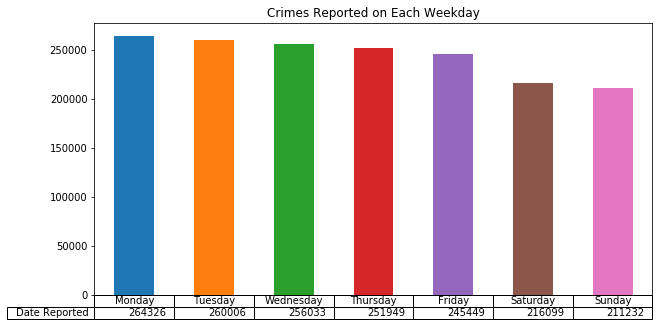

In [250]:
weekday_counts['Date Reported'].plot(kind ='bar',title='Crimes Reported on Each Weekday', figsize =(10, 5), table=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)

## Q1 Answer: 
Crimes are reported at most on Mondays and the reports decrease towards the end of the week. The least amount of report is received on Sunday. Crimes occurred more in weekdays than in weekends. 

# Q2: In which time group( time grouped in 4 hour intervals) has crime been occurred the most?

In [19]:
data[data['Time Occurred'].isnull()] #there are no null values

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays


In [20]:
max(data['Time Occurred'])

2359

In [21]:
min(data['Time Occurred'])

1

In [22]:

data['time_group'] = pd.cut(data['Time Occurred'], range(1, 2500, 400), right=False, labels=("12am - 4am", "4am - 8am", "8am - 12pm", "12pm - 4pm", "4pm - 8pm", "8pm -12am"))

In [23]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group
0,1208575,2013-03-14,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",Thursday,4pm - 8pm
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",Monday,8pm -12am
2,418,2013-03-19,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",Tuesday,8pm -12am
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",Thursday,4pm - 8pm
4,42104479,2014-01-11,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",Saturday,8pm -12am


In [24]:
data[data.time_group.isnull()] #no null values

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group


In [25]:
time_counts = data.groupby(by= data.time_group).count()

In [26]:
time_counts

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays
time_group,,,,,,,,,,,,,,,,,,,,,
12am - 4am,199595,199595,199595,199595,199595,199595,199595,199595,199515,180739,...,199594,199595,199594,16469,397,10,199595,38437,199595,199595
4am - 8am,148521,148521,148521,148521,148521,148521,148521,148521,148460,130729,...,148521,148521,148520,8877,224,10,148521,20793,148521,148521
8am - 12pm,330254,330254,330254,330254,330254,330254,330254,330254,330159,302452,...,330254,330254,330253,16992,337,14,330254,40107,330252,330254
12pm - 4pm,326371,326371,326371,326371,326371,326371,326371,326371,326337,298525,...,326371,326371,326371,20501,457,13,326371,55920,326369,326371
4pm - 8pm,388653,388653,388653,388653,388653,388653,388653,388653,388585,339303,...,388652,388653,388651,24111,534,16,388653,67933,388649,388653
8pm -12am,311700,311700,311700,311700,311700,311700,311700,311700,311646,268319,...,311700,311700,311699,21242,496,17,311700,60174,311699,311700


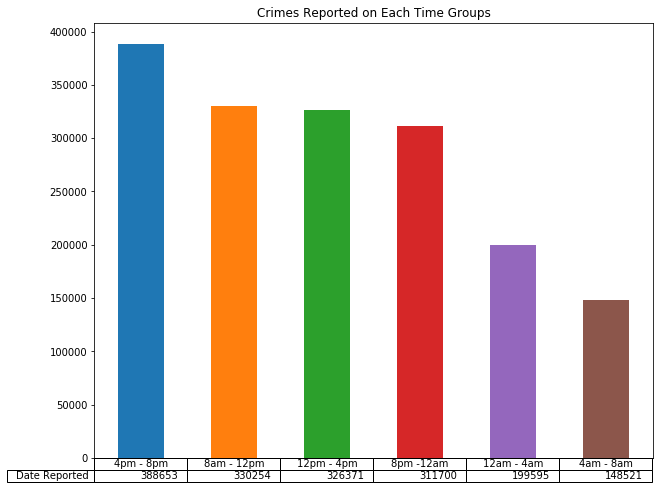

In [251]:
time_counts['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Crimes Reported on Each Time Groups', figsize =(10,8), table=True, sort_columns=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)

## Q2 Answer:
Crimes are reported at most between 4 pm and 8 pm (crime report count = 388,653). The least amount of reports are received between 4 am and 8 am (crime report count = 148,521). This shows that most of the crimes occurred between 4pm and 8pm. 

# Q3:  In which area ID has crime been reported the most?

In [28]:
Area_ID_counts = data.groupby(by= data['Area ID']).count()

In [29]:
Area_ID_counts

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group
Area ID,,,,,,,,,,,,,,,,,,,,,
1,73565,73565,73565,73565,73565,73565,73565,73553,67987,68147,...,73565,73565,5058,53,0,73565,23040,73565,73565,73565
2,71991,71991,71991,71991,71991,71991,71991,71979,65146,68600,...,71991,71991,6215,189,5,71991,17679,71990,71991,71991
3,110018,110018,110018,110018,110018,110018,110018,109994,100286,105204,...,110018,110015,7196,174,3,110018,20043,110017,110018,110018
4,62276,62276,62276,62276,62276,62276,62276,62264,52101,54068,...,62276,62276,4823,125,2,62276,10788,62276,62276,62276
5,75695,75695,75695,75695,75695,75695,75695,75685,65589,69842,...,75695,75694,5884,138,5,75695,9891,75694,75695,75695
6,78382,78382,78382,78382,78382,78382,78382,78348,70106,70220,...,78382,78382,6376,161,4,78382,17754,78382,78382,78382
7,69019,69019,69019,69019,69019,69019,69019,69015,63480,65320,...,69019,69018,4044,53,3,69019,9884,69018,69019,69019
8,71337,71337,71337,71337,71337,71337,71337,71332,64944,66287,...,71337,71336,3623,52,9,71337,6324,71336,71337,71337
9,81187,81187,81187,81187,81187,81187,81187,81146,73831,73194,...,81187,81187,3350,46,1,81187,9911,81187,81187,81187


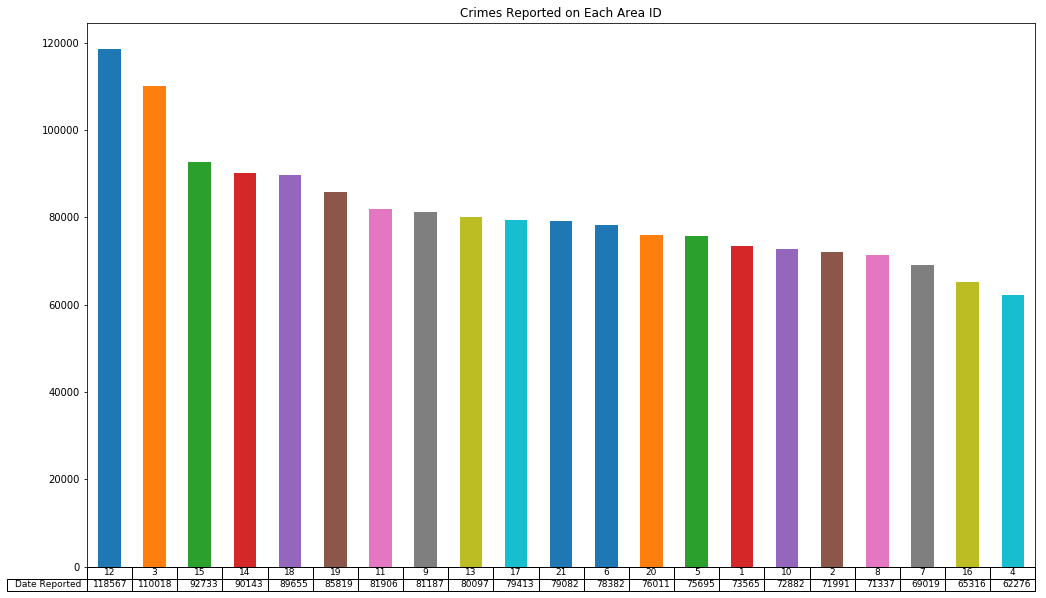

In [253]:
Area_ID_counts['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Crimes Reported on Each Area ID', figsize =(17,10), table=True, sort_columns=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)

## Q3 Answer:
Area ID: the LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. There Geographic Areas are sequentially numbered from 1-21. Area ID 12 recorded the most crime (with 118,567 reports in total), followed by Area ID 3 (with 110,018 reports in total). The least crimes are reported in the Area ID 4 (with 62,276 reports).

# Q4: What kind of crime occurred the most?

In [31]:
data['Crime Code'].value_counts()[:10]

624    155834
330    131123
510    130938
310    122861
440    121469
354    107052
626     92207
740     86118
745     76029
230     72942
Name: Crime Code, dtype: int64

In [32]:
Kind_of_crime_top10 = data['Crime Code'].value_counts()[:10]

In [33]:
Kind_of_crime_top10 = data.groupby(by= data['Crime Code']).count()

In [34]:
Kind_of_crime_top10 = Kind_of_crime_top10.nlargest(10, ('Date Reported'))

In [35]:
Kind_of_crime_top10

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code Description,MO Codes,Victim Age,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group
Crime Code,,,,,,,,,,,,,,,,,,,,,
624,155834,155834,155834,155834,155834,155834,155834,155834,154616,153429,...,155834,155833,3356,43,1,155834,33878,155834,155834,155834
330,131123,131123,131123,131123,131123,131123,131123,131123,130891,129294,...,131123,131123,4672,34,3,131123,25520,131119,131123,131123
510,130938,130938,130938,130938,130938,130938,130938,130938,244,114245,...,130938,130938,159,5,0,130938,31665,130936,130938,130938
310,122861,122861,122861,122861,122861,122861,122861,122861,122233,111106,...,122861,122861,11190,136,4,122861,785,122860,122861,122861
440,121469,121469,121469,121469,121469,121469,121469,121469,120753,109218,...,121469,121468,4829,84,2,121469,13269,121469,121469,121469
354,107052,107052,107052,107052,107052,107052,107052,107052,104510,105253,...,107052,107052,1971,61,1,107052,2077,107052,107052,107052
626,92207,92207,92207,92207,92207,92207,92207,92207,92132,91842,...,92207,92207,3132,12,0,92207,13117,92206,92207,92207
740,86118,86118,86118,86118,86118,86118,86118,86118,86004,76048,...,86118,86118,5902,35,0,86118,13721,86118,86118,86118
745,76029,76029,76029,76029,76029,76029,76029,76029,75866,69637,...,76029,76029,3062,30,0,76029,9257,76029,76029,76029


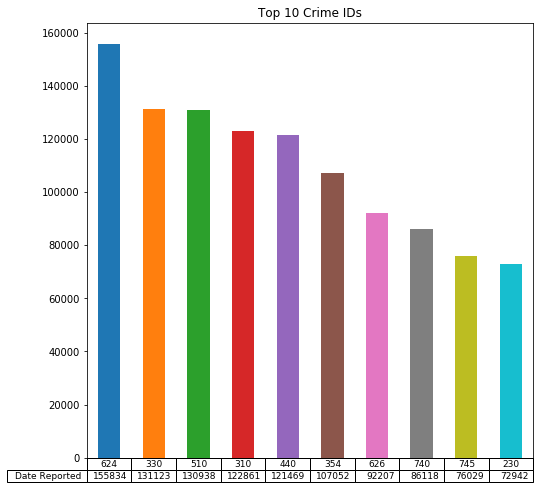

In [36]:

Kind_of_crime_top10['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Top 10 Crime IDs', figsize =(8,8), table=True, sort_columns=True)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)



In [37]:
data[data['Crime Code']==624]['Crime Code Description'].iloc[0]

'BATTERY - SIMPLE ASSAULT'

In [38]:
my_list = [624, 330, 510, 310, 440, 354, 626, 740, 745, 230]
Crime_code_names=[]
for i in my_list:
    y = data[data['Crime Code']==i]['Crime Code Description'].iloc[0]
    Crime_code_names.append(y)

In [39]:
legend_Kind = pd.DataFrame(Crime_code_names, index=Kind_of_crime_top10.index)
legend_Kind

,0
Crime Code,
624,BATTERY - SIMPLE ASSAULT
330,BURGLARY FROM VEHICLE
510,VEHICLE - STOLEN
310,BURGLARY
440,THEFT PLAIN - PETTY ($950 & UNDER)
354,THEFT OF IDENTITY
626,INTIMATE PARTNER - SIMPLE ASSAULT
740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


## Q4: Answer:
Simple assault (code 624) is most reported among the crimes list. Burglary from vehicle (code 330) comes second, while assault with deadly weapon (code 230) is the 10th most reported crime.   

# Q5: What is the victim age average and which age group is victimized the most?

In [40]:
data['Victim Age'].head()

0    30.0
1     NaN
2    12.0
3     NaN
4    84.0
Name: Victim Age, dtype: float64

In [41]:
data[data['Victim Age'].isnull()] #there are null values in here

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",Monday,8pm -12am
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",Thursday,4pm - 8pm
6,101105609,2010-01-28,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)",Thursday,8pm -12am
7,101620051,2010-11-11,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)",Thursday,12pm - 4pm
8,101910498,2010-04-07,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)",Wednesday,12pm - 4pm
10,101927640,2010-12-31,12/30/2010,2100,19,Mission,1964,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,NORDHOFF,TOBIAS,"(34.2354, -118.4517)",Friday,8pm -12am
11,101323794,2010-10-26,10/26/2010,1315,13,Newton,1321,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,21ST,BROADWAY,"(34.0294, -118.2671)",Tuesday,12pm - 4pm
26,101009426,2010-04-20,04/20/2010,1230,10,West Valley,1018,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,ARMINTA,GLORIA,"(34.2139, -118.4793)",Tuesday,12pm - 4pm
36,130100554,2013-01-16,01/16/2013,2110,1,Central,159,437,RESISTING ARREST,1402 2004 1212,...,Adult Arrest,437.0,998.0,NaN,NaN,4TH ST,MOLINO ST,"(34.043, -118.2341)",Wednesday,8pm -12am
39,130100564,2013-01-20,01/20/2013,1430,1,Central,135,210,ROBBERY,0326 0325 0344 0400 1300 1402,...,Invest Cont,210.0,998.0,NaN,NaN,2ND,LOS ANGELES,"(34.0503, -118.2433)",Sunday,12pm - 4pm


In [42]:
# in order to deal with the null values in age column, I will add average age to each null values. This won't affect the total average, so this won't affect the results
round(data['Victim Age'].mean())

36

In [43]:
import numpy as np
data['Victim Age'] = data['Victim Age'].replace(np.NaN, round(data['Victim Age'].mean()))

In [44]:
data['Victim Age'].head() #we replace the null values with the average age

0    30.0
1    36.0
2    12.0
3    36.0
4    84.0
Name: Victim Age, dtype: float64

In [48]:
print(max(data['Victim Age']))
print(min(data['Victim Age']))

99.0
10.0


In [51]:
#let's create age groups to see which groups affected the most
data['Victim_age_group'] = pd.cut(data['Victim Age'], range(10, 100, 20), right=False, labels=("10-30", "30-50", "50-70", "70-100"))

In [52]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group
0,1208575,2013-03-14,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",Thursday,4pm - 8pm,30-50
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",Monday,8pm -12am,30-50
2,418,2013-03-19,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",Tuesday,8pm -12am,10-30
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",Thursday,4pm - 8pm,30-50
4,42104479,2014-01-11,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",Saturday,8pm -12am,70-100


In [53]:
Age_group_counts = data.groupby(by= data['Victim_age_group']).count()

In [54]:
Age_group_counts

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group
Victim_age_group,,,,,,,,,,,,,,,,,,,,,
10-30,643145,643145,643145,643145,643145,643145,643145,643145,642846,498508,...,643145,643144,39590,998,41,643145,137575,643140,643145,643145
30-50,712469,712469,712469,712469,712469,712469,712469,712469,712391,678181,...,712469,712465,50578,1083,31,712469,104522,712467,712469,712469
50-70,295648,295648,295648,295648,295648,295648,295648,295648,295633,290502,...,295648,295647,15556,314,7,295648,37331,295646,295648,295648
70-100,50683,50683,50683,50683,50683,50683,50683,50683,50683,49798,...,50683,50683,2305,47,1,50683,3740,50683,50683,50683


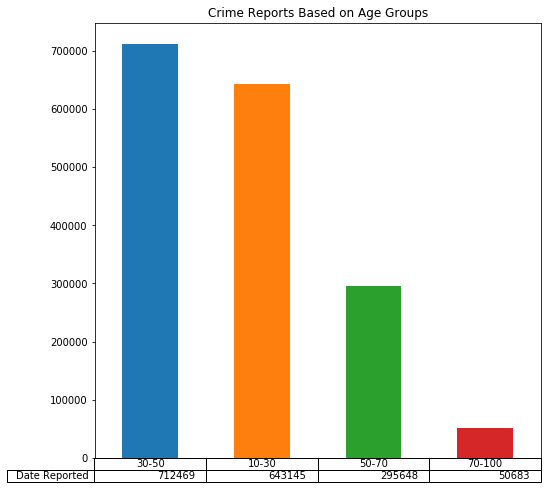

In [62]:
Age_group_counts['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Crime Reports Based on Age Groups', figsize =(8,8), table=True, sort_columns=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)

## Q5 Answer: 
People who are between 30 and 50 years old are victimized the most, while older people who are between 50 and 100 are victimized less.

# Q6: Which gender is victimized the most?


In [63]:
data['Victim Sex'].head() #we have nan values, we will exclude those in our analysis, because replacing those nan values with either female or male will affect the analysis

0      F
1    NaN
2    NaN
3    NaN
4      M
Name: Victim Sex, dtype: object

In [67]:
data['Victim Sex'].value_counts()
# We will only include F and M.

M    793765
F    724589
X     29517
H        56
-         1
Name: Victim Sex, dtype: int64

In [72]:
Victim_Gender_group = data.groupby(['Victim Sex']).size()

In [79]:
female =Victim_Gender_group.iloc[1]

In [82]:
male = Victim_Gender_group.iloc[3]

In [85]:
female_male = pd.DataFrame({'f': female, 'm': male}, index=[1])

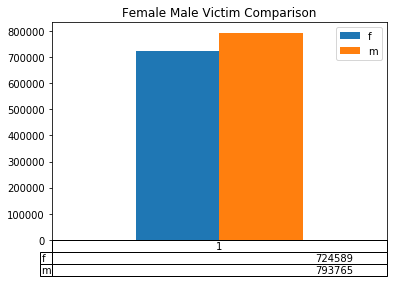

In [102]:
female_male.sort_values(by=['f'], ascending =False, inplace=False).plot.bar(table=True, title='Female Male Victim Comparison')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)


## Q6 Answer:
Males are victimized more than females

# Q7: Which descent is victimized the most?

In [103]:
data['Victim Descent'].head()

0      W
1    NaN
2    NaN
3    NaN
4      W
Name: Victim Descent, dtype: object

In [104]:
data['Victim Descent'].value_counts()

H    589938
W    419478
B    273109
O    164853
X     48283
A     40246
K      7631
F      2004
I       722
C       647
P       297
J       251
U       159
V        92
G        70
Z        59
S        26
D        15
L        10
-         1
Name: Victim Descent, dtype: int64

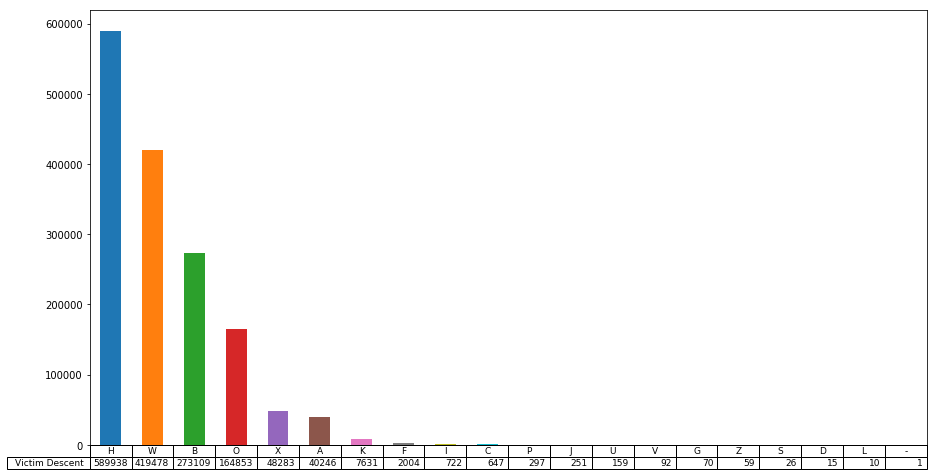

In [116]:
data['Victim Descent'].value_counts().plot(kind='bar', figsize=(15, 8), table=True)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)


## Q7 Answer:
The descent letter explanations can be found at the beginning of this notebook under the title 'Column Explanations.' 
    * A: other Asian
    * B: Black
    * C: Chinese
    * D: Cambodian
    * F: Filipino 
    * G: Guamanian 
    * H: Hispanic/Latin/Mexican
    * I: American Indian/Alaskan Native
    * J: Japanese
    * K: Korean
    * L: Laotian
    * O: Other
    * P: Pacific Islander
    * S: Samoan
    * U: Hawaiian 
    * V: Vietnamese
    * W: White
    * X: Unknown
    * Z: Asian Indian
People of Hispanic descent are victimized the most, followed by people of white descent. 


# Q8: What type of structure, vehicle, or location did the crime take place?

In [119]:
data['Premise Description'].head()

0    MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
1                                          STREET
2                                          STREET
3                                          STREET
4                          SINGLE FAMILY DWELLING
Name: Premise Description, dtype: object

In [120]:
data['Premise Description'].value_counts()

STREET                                            380158
SINGLE FAMILY DWELLING                            350830
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)      218740
PARKING LOT                                       121454
SIDEWALK                                           85035
OTHER BUSINESS                                     76215
VEHICLE, PASSENGER/TRUCK                           64883
DRIVEWAY                                           35014
GARAGE/CARPORT                                     30554
DEPARTMENT STORE                                   23834
RESTAURANT/FAST FOOD                               22935
MARKET                                             17628
OTHER STORE                                        13520
PARKING UNDERGROUND/BUILDING                       11969
YARD (RESIDENTIAL/BUSINESS)                        11888
PARK/PLAYGROUND                                    11669
OTHER PREMISE                                      11321
HIGH SCHOOL                    

In [132]:
data[data['Premise Code'].isnull()] #there are null values

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group
1020,101926208,2010-12-07,12/07/2010,1330,19,Mission,1963,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,14500 VAN NUYS BL,NaN,"(34.2471, -118.4482)",Tuesday,12pm - 4pm,30-50
2099,101223939,2010-09-17,06/01/2010,1200,12,77th Street,1213,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,NaN,...,812.0,NaN,NaN,NaN,1700 W 52ND ST,NaN,"(33.9951, -118.3068)",Friday,8am - 12pm,30-50
60684,100908076,2010-03-16,03/15/2010,2205,15,N Hollywood,1547,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,420.0,NaN,NaN,NaN,BECK,CHANDLER,"(34.1687, -118.3834)",Tuesday,8pm -12am,30-50
86240,101017796,2010-09-21,09/08/2010,1720,10,West Valley,1067,813,CHILD ANNOYING (17YRS & UNDER),NaN,...,813.0,NaN,NaN,NaN,5400 LOUISE AV,NaN,"(34.1694, -118.5098)",Tuesday,4pm - 8pm,10-30
103315,101214269,2010-05-13,05/12/2010,1800,12,77th Street,1242,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,NaN,...,235.0,NaN,NaN,NaN,6200 3RD AV,NaN,"(33.9837, -118.3206)",Thursday,4pm - 8pm,30-50
124629,101410405,2010-04-12,04/11/2010,2320,14,Pacific,1494,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,420.0,NaN,NaN,NaN,300 WORLD WY,NaN,"(33.944, -118.4073)",Monday,8pm -12am,10-30
187978,102021480,2010-10-04,10/02/2010,1900,20,Olympic,2079,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,NaN,...,812.0,NaN,NaN,NaN,2200 W 14TH ST,NaN,"(34.0463, -118.2864)",Monday,4pm - 8pm,30-50
213932,100121447,2010-12-12,12/12/2010,1150,1,Central,185,110,CRIMINAL HOMICIDE,NaN,...,110.0,NaN,NaN,NaN,200 W OLYMPIC BL,NaN,"(34.0409, -118.2574)",Sunday,8am - 12pm,30-50
221376,100220305,2010-11-02,11/02/2010,1220,2,Rampart,266,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,NaN,...,235.0,NaN,NaN,NaN,700 S BURLINGTON AV,NaN,"(34.055, -118.2735)",Tuesday,12pm - 4pm,30-50
273786,100815134,2010-09-09,09/09/2010,815,8,West LA,889,110,CRIMINAL HOMICIDE,NaN,...,110.0,NaN,NaN,NaN,2000 S CORNING ST,NaN,"(34.041, -118.3802)",Thursday,8am - 12pm,30-50


In [133]:
min(data['Premise Code'])

101.0

In [134]:
# I will fill null values with 0
data['Premise Code'] = data['Premise Code'].replace(np.NaN, 0)

In [135]:
data[data['Premise Code'].isnull()] # no null values left

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group


In [137]:
data['Premise Code'] = data['Premise Code'].astype(int)

In [138]:
data['Premise Code'].value_counts()[:10]

101    380158
501    350830
502    218740
108    121454
102     85035
203     76215
122     64883
104     35014
707     30554
404     23834
Name: Premise Code, dtype: int64

In [139]:
Premise_code_list = [101, 501, 502, 108, 102, 203, 122, 104, 707, 404]
Premise_code_names=[]
for i in Premise_code_list:
    y = data[data['Premise Code']==i]['Premise Description'].iloc[0]
    Premise_code_names.append(y)

In [140]:
Premise_code_names

['STREET',
 'SINGLE FAMILY DWELLING',
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
 'PARKING LOT',
 'SIDEWALK',
 'OTHER BUSINESS',
 'VEHICLE, PASSENGER/TRUCK',
 'DRIVEWAY',
 'GARAGE/CARPORT',
 'DEPARTMENT STORE']

In [142]:
Premise_code_top10 = data.groupby(by= data['Premise Code']).count()

Premise_code_top10 =  Premise_code_top10.nlargest(10, ('Date Reported'))

In [143]:
Premise_code_top10

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group
Premise Code,,,,,,,,,,,,,,,,,,,,,
101,380158,380158,380158,380158,380158,380158,380158,380158,380002,260519,...,380157,21722,529,17,380158,152120,380158,380158,380158,379981
501,350830,350830,350830,350830,350830,350830,350830,350830,350755,342538,...,350829,19409,508,13,350830,5227,350830,350830,350830,349168
502,218740,218740,218740,218740,218740,218740,218740,218740,218684,214124,...,218740,14291,452,17,218740,3165,218740,218740,218740,218294
108,121454,121454,121454,121454,121454,121454,121454,121454,121450,95911,...,121453,5736,133,4,121454,20788,121454,121454,121454,121348
102,85035,85035,85035,85035,85035,85035,85035,85035,85020,83864,...,85034,7834,139,3,85035,48926,85035,85035,85035,84981
203,76215,76215,76215,76215,76215,76215,76215,76215,76211,72906,...,76215,5926,69,2,76215,3975,76215,76215,76215,76129
122,64883,64883,64883,64883,64883,64883,64883,64883,64883,64735,...,64883,2313,65,3,64883,14561,64883,64883,64883,64836
104,35014,35014,35014,35014,35014,35014,35014,35014,35012,27474,...,35014,1404,21,4,35014,632,35014,35014,35014,34983
707,30554,30554,30554,30554,30554,30554,30554,30554,30554,26526,...,30554,1436,25,1,30554,411,30554,30554,30554,30509


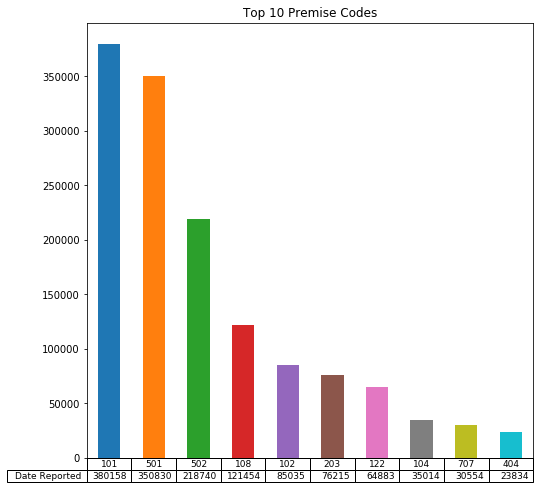

In [144]:
Premise_code_top10['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Top 10 Premise Codes', figsize =(8,8), table=True, sort_columns=True)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)


In [145]:
legend_premise = pd.DataFrame(Premise_code_names, index=Premise_code_top10.index)

In [147]:
legend_premise

,0
Premise Code,
101,STREET
501,SINGLE FAMILY DWELLING
502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
108,PARKING LOT
102,SIDEWALK
203,OTHER BUSINESS
122,"VEHICLE, PASSENGER/TRUCK"
104,DRIVEWAY
707,GARAGE/CARPORT


## Q8 Answer:
Crimes occurred the most in the street. Street is followed by single family dwelling. 10th most occurred place is the department stores.

# Q9: Which weapon is used the most?

In [150]:
data.dtypes

DR Number                          int64
Date Reported             datetime64[ns]
Date Occurred                     object
Time Occurred                      int64
Area ID                            int64
Area Name                         object
Reporting District                 int64
Crime Code                         int64
Crime Code Description            object
MO Codes                          object
Victim Age                       float64
Victim Sex                        object
Victim Descent                    object
Premise Code                       int64
Premise Description               object
Weapon Used Code                 float64
Weapon Description                object
Status Code                       object
Status Description                object
Crime Code 1                     float64
Crime Code 2                     float64
Crime Code 3                     float64
Crime Code 4                     float64
Address                           object
Cross Street    

In [151]:
data[data['Weapon Used Code'].isnull()]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group
1,102005556,2010-01-25,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",Monday,8pm -12am,30-50
2,418,2013-03-19,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",Tuesday,8pm -12am,10-30
3,101822289,2010-11-11,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",Thursday,4pm - 8pm,30-50
4,42104479,2014-01-11,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",Saturday,8pm -12am,70-100
6,101105609,2010-01-28,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)",Thursday,8pm -12am,30-50
7,101620051,2010-11-11,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)",Thursday,12pm - 4pm,30-50
8,101910498,2010-04-07,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)",Wednesday,12pm - 4pm,30-50
9,120908292,2013-03-29,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)",Friday,4am - 8am,10-30
10,101927640,2010-12-31,12/30/2010,2100,19,Mission,1964,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,NORDHOFF,TOBIAS,"(34.2354, -118.4517)",Friday,8pm -12am,30-50
11,101323794,2010-10-26,10/26/2010,1315,13,Newton,1321,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,21ST,BROADWAY,"(34.0294, -118.2671)",Tuesday,12pm - 4pm,30-50


In [155]:
data['Weapon Used Code'] = data['Weapon Used Code'].fillna(0).astype(int) 
#I filled the null values with 0

In [159]:
data['Weapon Used Code'].value_counts()[1:11] #null values are the first, therefore to find the top 10, the range will be 1:11

400    343895
511     46952
500     44193
102     27105
109     10731
200     10120
207      7513
106      6424
307      5768
101      4842
Name: Weapon Used Code, dtype: int64

In [164]:
Weapon_code_top10 = data.groupby(by= data['Weapon Used Code']).count()

Weapon_code_top10 =  Weapon_code_top10.nlargest(11, ('Date Reported'))
Weapon_code_top10 =  Weapon_code_top10.drop([0])

In [165]:
Weapon_code_top10

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,weekdays,time_group,Victim_age_group
Weapon Used Code,,,,,,,,,,,,,,,,,,,,,
400,343895,343895,343895,343895,343895,343895,343895,343895,343798,340805,...,343894,21529,788,33,343895,83663,343893,343895,343895,343526
511,46952,46952,46952,46952,46952,46952,46952,46952,46922,45792,...,46951,2847,124,5,46952,6135,46952,46952,46952,46914
500,44193,44193,44193,44193,44193,44193,44193,44193,44187,43612,...,44193,4526,83,2,44193,9043,44193,44193,44193,44114
102,27105,27105,27105,27105,27105,27105,27105,27105,27098,26736,...,27104,6269,193,5,27105,10932,27105,27105,27105,27086
109,10731,10731,10731,10731,10731,10731,10731,10731,10731,10638,...,10731,2518,70,3,10731,4208,10731,10731,10731,10723
200,10120,10120,10120,10120,10120,10120,10120,10120,10118,10028,...,10120,2700,106,3,10120,3783,10120,10120,10120,10107
207,7513,7513,7513,7513,7513,7513,7513,7513,7513,7443,...,7513,1563,50,6,7513,3056,7513,7513,7513,7511
106,6424,6424,6424,6424,6424,6424,6424,6424,6424,6402,...,6424,1944,42,0,6424,2374,6424,6424,6424,6420
307,5768,5768,5768,5768,5768,5768,5768,5768,5768,5658,...,5768,360,8,0,5768,3056,5768,5768,5768,5766


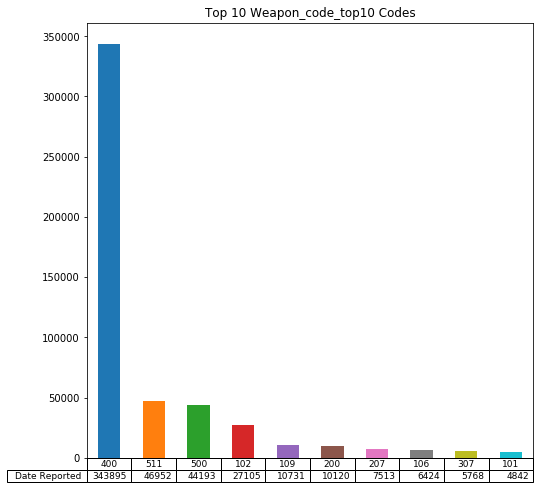

In [166]:
Weapon_code_top10['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Top 10 Weapon_code_top10 Codes', figsize =(8,8), table=True, sort_columns=True)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)


In [167]:
Weapon_code_list = [400, 511, 500, 102, 109, 200, 207, 106, 307, 101]
Weapon_code_names=[]
for i in Weapon_code_list:
    y = data[data['Weapon Used Code']==i]['Weapon Description'].iloc[0]
    Weapon_code_names.append(y)

In [168]:
legend_weapon = pd.DataFrame(Weapon_code_names, index = Weapon_code_top10.index)

In [169]:
legend_weapon

,0
Weapon Used Code,
400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
511,VERBAL THREAT
500,UNKNOWN WEAPON/OTHER WEAPON
102,HAND GUN
109,SEMI-AUTOMATIC PISTOL
200,KNIFE WITH BLADE 6INCHES OR LESS
207,OTHER KNIFE
106,UNKNOWN FIREARM
307,VEHICLE


## Q9 Answer:
Hands, fist, feet or bodily force are most used as a weapon. Verbal threat is the second most used weapon. While hand gun is the fourth most used weapon, revolver is the 10th most used weapon. 

# Q10: What are the top 3 locations in crime?


In [172]:
data['Crime Code 1'].value_counts()

624.0    156024
330.0    131224
510.0    130932
310.0    122867
440.0    121440
354.0    107101
626.0     92361
740.0     86223
745.0     76130
230.0     72945
420.0     69666
210.0     68271
341.0     60246
930.0     47280
442.0     38020
331.0     24560
649.0     20010
956.0     17439
946.0     17375
900.0     16985
888.0     15832
901.0     14775
350.0     11357
320.0     10576
236.0     10066
761.0      9864
480.0      9850
220.0      9701
860.0      8765
121.0      8029
          ...  
485.0        31
942.0        29
353.0        27
436.0        21
931.0        21
840.0        20
446.0        19
452.0        19
475.0        19
884.0        18
470.0        14
349.0        12
882.0        11
948.0        10
445.0         8
830.0         8
234.0         6
521.0         6
952.0         5
845.0         5
113.0         4
472.0         3
432.0         3
430.0         2
906.0         1
111.0         1
453.0         1
431.0         1
486.0         1
999.0         1
Name: Crime Code 1, Leng

In [ ]:
location_crime_code_1 = []
for i in range(len(data)):
    if data['Crime Code 1'][i].isnull() == False:
        y = data['Location '][i]
        location_crime_code_1.append(y)

510.0

In [174]:
data['Location '].value_counts()

(0, 0)                  6984
(34.1016, -118.3387)    3242
(34.1905, -118.6059)    2339
(33.9892, -118.3089)    2031
(34.1576, -118.438)     1821
(34.2216, -118.4488)    1701
(34.0442, -118.2439)    1609
(33.944, -118.4073)     1607
(34.2564, -118.5536)    1585
(34.0423, -118.2452)    1524
(34.0761, -118.3766)    1464
(34.048, -118.2577)     1462
(34.0605, -118.4193)    1436
(34.244, -118.5583)     1384
(34.0102, -118.3351)    1327
(34.0446, -118.245)     1247
(34.0761, -118.3563)    1235
(34.1016, -118.3417)    1215
(34.011, -118.3351)     1209
(34.0242, -118.3722)    1184
(34.046, -118.2509)     1117
(34.0502, -118.254)     1110
(34.1016, -118.331)     1094
(34.1867, -118.3703)    1078
(34.1016, -118.3267)    1037
(34.0481, -118.2507)     992
(33.9708, -118.2783)     969
(34.0596, -118.2749)     961
(34.0449, -118.2458)     956
(34.0124, -118.3351)     946
                        ... 
(33.9599, -118.4024)       1
(34.1122, -118.3314)       1
(34.0111, -118.266)        1
(34.0651, -118

In [211]:
Location_top3 = data.groupby(by= data['Location ']).count()

Location_top3 =  Location_top3.nlargest(4, ('Date Reported'))
Location_top3 = Location_top3.drop(Location_top3.index[0])

In [212]:
Location_top3

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,weekdays,time_group,Victim_age_group
Location,,,,,,,,,,,,,,,,,,,,,
"(34.1016, -118.3387)",3242,3242,3242,3242,3242,3242,3242,3242,3242,3010,...,3242,3242,294,4,0,3242,1079,3242,3242,3240
"(34.1905, -118.6059)",2339,2339,2339,2339,2339,2339,2339,2339,2339,2263,...,2339,2339,204,1,1,2339,0,2339,2339,2337
"(33.9892, -118.3089)",2031,2031,2031,2031,2031,2031,2031,2031,2030,1834,...,2031,2031,70,2,1,2031,549,2031,2031,2030


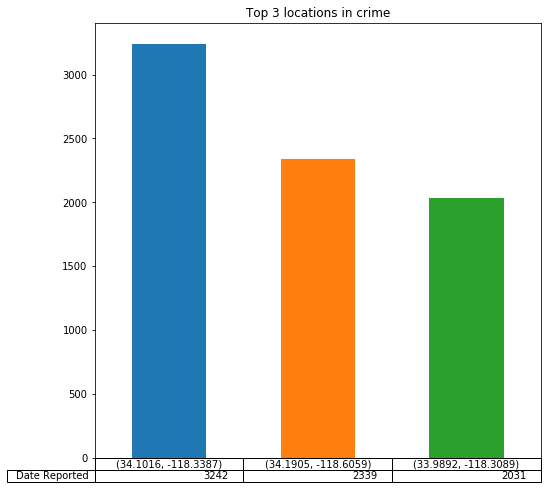

In [247]:
Location_top3['Date Reported'].sort_values(ascending =False).plot(kind ='bar',title='Top 3 locations in crime', figsize =(8,8), table=True, sort_columns=True)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_xaxis().set_visible(False)

In [219]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3()
location1 = geolocator.reverse("34.1016, -118.3387")


In [233]:
most_crime_location1 = location1[0].address

In [236]:
most_crime_location1

'1700-1710 N Highland Ave, Los Angeles, CA 90028, USA'

In [222]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3()
location2 = geolocator.reverse("34.1905, -118.6059")

In [231]:
most_crime_location2 =location2[0].address

In [235]:
most_crime_location2

'6602-6612 Topanga Canyon Blvd, Canoga Park, CA 91303, USA'

In [226]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3()
location3 = geolocator.reverse("33.9892, -118.3089")

In [229]:
most_crime_location3 = location3[0].address

In [230]:
most_crime_location3

'5806 S Western Ave, Los Angeles, CA 90047, USA'

In [244]:
legend_location = pd.DataFrame([most_crime_location1, most_crime_location2,most_crime_location3], index = Location_top3.index)

In [245]:
legend_location

,0
Location,
"(34.1016, -118.3387)","1700-1710 N Highland Ave, Los Angeles, CA 9002..."
"(34.1905, -118.6059)","6602-6612 Topanga Canyon Blvd, Canoga Park, CA..."
"(33.9892, -118.3089)","5806 S Western Ave, Los Angeles, CA 90047, USA"


## Q10 Answer:
N Highland Ave (Hollywood), Topanga Canyon Blvd (Canoga Park) and Western Ave (Koreatown - Hollywood) are the top 3 locations in which crime reported.